\- 결과 미리보기 -
# MinMaxScaler - 0.8425
# StandardScaler - 0.8503
# MaxAbsScaler - 0.8483
# RobustScaler - 0.8495
# Normalizer - 0.8463

In [1]:
#상위 폴더 load_data파일 불러오기 위해 경로 추가
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

# 데이터 가져오기
from load_data import load_data

# 사용자 지정 함수 불러오기
from eval import get_Accuracy_tf

# 텐서플로
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as Layer

# 콜백
from timeit import default_timer as timer

In [2]:
# 랜덤시드 고정
tf.random.set_seed(42)

In [3]:
# MinMaxScaler - 0, StandardScaler - 1, , MaxAbsScaler - 2, RobustScaler - 3, Normalizer - 4
X_train0, X_val0, X_test0, y_train0, y_val0, y_test0, scaler0  = load_data(scaler=0)
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1, scaler1  = load_data(scaler=1)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2, scaler2  = load_data(scaler=2)
X_train3, X_val3, X_test3, y_train3, y_val3, y_test3, scaler3  = load_data(scaler=3)
X_train4, X_val4, X_test4, y_train4, y_val4, y_test4, scaler4  = load_data(scaler=4)

X_train1.shape, X_val1.shape, X_test2.shape, y_train2.shape, y_val2.shape, y_test2.shape, scaler2



((2672, 10), (669, 10), (836, 10), (2672,), (669,), (836,), MaxAbsScaler())

In [4]:

def get_model(nodes=10, drop_rate= 0.2, activation= 'relu'):
  # base 모델 만들기

  model = Sequential([Layer.Dense(nodes, input_shape=(len(X_train0.columns),))])
  model.add(Layer.Dense(nodes, activation = activation))
  model.add(Layer.Dense(1, activation = 'relu'))

  model.compile(optimizer = 'adam',
                loss='mean_squared_error',
                metrics = [get_Accuracy_tf])

  return model

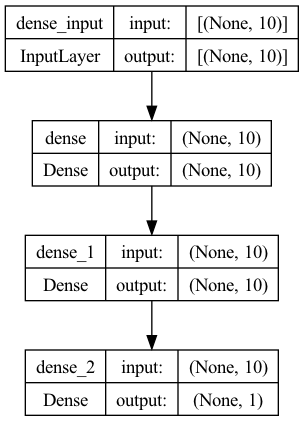

In [5]:
model = get_model()
keras.utils.plot_model(model, show_shapes=True)

In [6]:

# 학습 소요 시간 표시 콜백용 class 정의
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print("Starting training")
        self.starttime = timer()

    def on_train_end(self, logs=None):
        print("End of training, took {} seconds".format(timer()-self.starttime))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
          print("Epoch is {} and {} seconds passed".format(epoch, timer()-self.starttime))

In [7]:
check_path = 'model_weight.h5'

callback = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=200, min_lr=0.001),
    TimingCallback()
]

In [8]:
history0 = model.fit(X_train0, y_train0, batch_size= 1024, epochs= 1000,  validation_data=(X_val0, y_val0), callbacks=callback,verbose = 0)
results0 = model.evaluate(X_test0, y_test0)

Starting training
Epoch is 0 and 0.2503743330016732 seconds passed
Epoch is 10 and 0.398629582952708 seconds passed
Epoch is 20 and 0.5485362920444459 seconds passed
Epoch is 30 and 0.6970262080430984 seconds passed
Epoch is 40 and 0.8396397919859737 seconds passed
Epoch is 50 and 0.9825097499415278 seconds passed
Epoch is 60 and 1.130788957932964 seconds passed
Epoch is 70 and 1.278527457965538 seconds passed
Epoch is 80 and 1.4200891249347478 seconds passed
Epoch is 90 and 1.5681789580266923 seconds passed
Epoch is 100 and 1.7236142500769347 seconds passed
Epoch is 110 and 1.8692405419424176 seconds passed
Epoch is 120 and 2.013679791940376 seconds passed
Epoch is 130 and 2.160374332917854 seconds passed
Epoch is 140 and 2.304904333082959 seconds passed
Epoch is 150 and 2.4484068751335144 seconds passed
Epoch is 160 and 2.595907000126317 seconds passed
Epoch is 170 and 2.744431958068162 seconds passed
Epoch is 180 and 2.8888363330624998 seconds passed
Epoch is 190 and 3.0467147079762

In [9]:
history1 = model.fit(X_train1, y_train1, batch_size= 1024, epochs= 1000,  validation_data=(X_val1, y_val1), callbacks=callback,verbose = 0)
results1 = model.evaluate(X_test1, y_test1)

Starting training
Epoch is 0 and 0.03774920804426074 seconds passed
Epoch is 10 and 0.1687263329513371 seconds passed
Epoch is 20 and 0.3011775000486523 seconds passed
Epoch is 30 and 0.43029737495817244 seconds passed
Epoch is 40 and 0.5531998330261558 seconds passed
Epoch is 50 and 0.6777252499014139 seconds passed
Epoch is 60 and 0.8067120409104973 seconds passed
Epoch is 70 and 0.9336482079233974 seconds passed
Epoch is 80 and 1.0611138329841197 seconds passed
Epoch is 90 and 1.1937517910264432 seconds passed
Epoch is 100 and 1.3222997500561178 seconds passed
Epoch is 110 and 1.4501191249582916 seconds passed
Epoch is 120 and 1.5753725410904735 seconds passed
Epoch is 130 and 1.7031983330380172 seconds passed
Epoch is 140 and 1.8319956250488758 seconds passed
Epoch is 150 and 1.9566415830049664 seconds passed
Epoch is 160 and 2.0947430410888046 seconds passed
Epoch is 170 and 2.2237144159153104 seconds passed
Epoch is 180 and 2.3521259999834 seconds passed
Epoch is 190 and 2.481459

In [10]:
history2 = model.fit(X_train2, y_train2, batch_size= 1024, epochs= 1000,  validation_data=(X_val2, y_val2), callbacks=callback,verbose = 0)
results2 = model.evaluate(X_test2, y_test2)

Starting training
Epoch is 0 and 0.03744354215450585 seconds passed
Epoch is 10 and 0.1643605420831591 seconds passed
Epoch is 20 and 0.286645834101364 seconds passed
Epoch is 30 and 0.40719800000078976 seconds passed
Epoch is 40 and 0.5312796670477837 seconds passed
Epoch is 50 and 0.6653804171364754 seconds passed
Epoch is 60 and 0.8020517921540886 seconds passed
Epoch is 70 and 0.9329244589898735 seconds passed
Epoch is 80 and 1.0602736670989543 seconds passed
Epoch is 90 and 1.1883493750356138 seconds passed
Epoch is 100 and 1.3126393749844283 seconds passed
Epoch is 110 and 1.4422215840313584 seconds passed
Epoch is 120 and 1.5747199170291424 seconds passed
Epoch is 130 and 1.6996009170543402 seconds passed
Epoch is 140 and 1.8261181670241058 seconds passed
Epoch is 150 and 1.962859584018588 seconds passed
Epoch is 160 and 2.0896859590429813 seconds passed
Epoch is 170 and 2.218431250192225 seconds passed
Epoch is 180 and 2.351307792123407 seconds passed
Epoch is 190 and 2.4903155

In [11]:
history3 = model.fit(X_train3, y_train3, batch_size= 1024, epochs= 1000,  validation_data=(X_val3, y_val3), callbacks=callback,verbose = 0)
results3 = model.evaluate(X_test3, y_test3)

Starting training
Epoch is 0 and 0.037081583170220256 seconds passed
Epoch is 10 and 0.1651612501591444 seconds passed
Epoch is 20 and 0.2931516671087593 seconds passed
Epoch is 30 and 0.4899864171165973 seconds passed
Epoch is 40 and 0.6179238751064986 seconds passed
Epoch is 50 and 0.744167875032872 seconds passed
Epoch is 60 and 0.8729566670954227 seconds passed
Epoch is 70 and 1.0016305830795318 seconds passed
Epoch is 80 and 1.1316048330627382 seconds passed
Epoch is 90 and 1.2698792500887066 seconds passed
Epoch is 100 and 1.3992569581605494 seconds passed
Epoch is 110 and 1.5270990000572056 seconds passed
Epoch is 120 and 1.6669202919583768 seconds passed
Epoch is 130 and 1.7939763751346618 seconds passed
Epoch is 140 and 1.9204336670227349 seconds passed
Epoch is 150 and 2.0499521251767874 seconds passed
Epoch is 160 and 2.1894796669948846 seconds passed
Epoch is 170 and 2.3221210830379277 seconds passed
Epoch is 180 and 2.44630412501283 seconds passed
Epoch is 190 and 2.570456

In [12]:
history4 = model.fit(X_train4, y_train4, batch_size= 1024, epochs= 1000,  validation_data=(X_val4, y_val4), callbacks=callback,verbose = 0)
results4 = model.evaluate(X_test4, y_test4)

Starting training
Epoch is 0 and 0.03736654203385115 seconds passed
Epoch is 10 and 0.16252091713249683 seconds passed
Epoch is 20 and 0.285807125037536 seconds passed
Epoch is 30 and 0.40909466706216335 seconds passed
Epoch is 40 and 0.5318043341394514 seconds passed
Epoch is 50 and 0.6545216671656817 seconds passed
Epoch is 60 and 0.7822639171499759 seconds passed
Epoch is 70 and 0.9051586671266705 seconds passed
Epoch is 80 and 1.027180417208001 seconds passed
Epoch is 90 and 1.1501512092072517 seconds passed
Epoch is 100 and 1.2729823340196162 seconds passed
Epoch is 110 and 1.3950240421108902 seconds passed
Epoch is 120 and 1.5159459591377527 seconds passed
Epoch is 130 and 1.638658125186339 seconds passed
Epoch is 140 and 1.7700776671990752 seconds passed
Epoch is 150 and 1.9011845840141177 seconds passed
Epoch is 160 and 2.0250628751236945 seconds passed
Epoch is 170 and 2.1470591670367867 seconds passed
Epoch is 180 and 2.2968254170846194 seconds passed
Epoch is 190 and 2.44533